In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#abrindo os dados
df = pd.read_csv('ET0.csv')

In [3]:
# Retirando valores nulos
df = df.dropna()
df= df.drop(['Estacao', 'Data', 'Hora'], axis = 1)


([<matplotlib.axis.YTick at 0x7f31fafb87f0>,
 <a list of 11 Text yticklabel objects>)

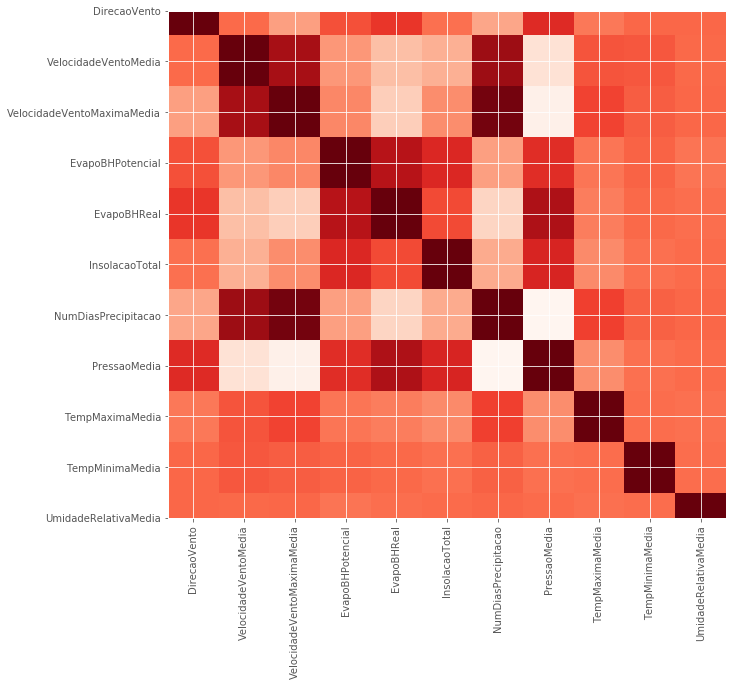

In [4]:
# Analisando a correlação dos dados

plt.figure(figsize=(10,10))
plt.style.use('ggplot')
plt.imshow(df.corr(),cmap='Reds')
plt.xticks(range(len(df.columns)),df.columns.values,rotation='vertical')
plt.yticks(range(len(df.columns)),df.columns.values)

In [5]:
df.columns

Index(['DirecaoVento', 'VelocidadeVentoMedia', 'VelocidadeVentoMaximaMedia',
       'EvapoBHPotencial', 'EvapoBHReal', 'InsolacaoTotal',
       'NumDiasPrecipitacao', 'PressaoMedia', 'TempMaximaMedia',
       'TempMinimaMedia', 'UmidadeRelativaMedia'],
      dtype='object')

In [6]:
#definindo variaveis dependentes e independentes 
x = df[['PressaoMedia',  'TempMaximaMedia',  
        'UmidadeRelativaMedia','DirecaoVento','InsolacaoTotal' ]].values

y = df[['EvapoBHReal']].values.ravel()


In [7]:
# Padronizando os dados 

from sklearn.preprocessing import StandardScaler

In [8]:
stander = StandardScaler()
x = stander.fit(x).transform(x)

In [9]:
# dividindo o conjunto de dados 
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [11]:
# Chamando a algoritmos de machine learning
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [12]:
# cria dicionario com os algorimos utilizados 
ESTIMATORS = {                              
    "RandomForestRegressor": RandomForestRegressor(max_depth=100, random_state=2),    
    "SVR":SVR(gamma='auto'),   
    "GBR" :GradientBoostingRegressor(n_estimators=35),
    "AdaB" :AdaBoostRegressor(n_estimators=5)
}

In [13]:
import time
from sklearn.metrics import mean_squared_error

In [14]:
# aplicando os algortimos
y_test_predict = dict()
Tii = time.process_time()
y_mse = dict()
y_r2 = dict()
tempro = dict()
i=1
for name, estimator in ESTIMATORS.items():
    Ti = time.clock()
    estimator.fit(x_train, y_train)                    # fit() with instantiated object
    y_test_predict[name] = previsao = estimator.predict(x_test)   # Make predictions and save it in dict under key: name
    y_mse[name] = mean_squared_error(y_test, estimator.predict(x_test))
    y_r2[name] = estimator.score(x_test,y_test)
    Tf = time.clock()    
    tempro[name] = Tf - Ti
    print(name + ' Concluido')

    

Resultados=pd.DataFrame({'mse':list(y_mse.values()),    # Padronizando o os dois
                 'R2':list(y_r2.values()),
               'Tempo':list(tempro.values())},               
                index=list(y_r2.keys()))

Tff = time.process_time()

print(Tff - Tii)

RandomForestRegressor Concluido
SVR Concluido
GBR Concluido
AdaB Concluido
0.048717716999999716


/home/pensario/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
Resultados

,mse,R2,Tempo
RandomForestRegressor,382.118891,0.824057,0.016298
SVR,1437.897817,0.337933,0.008428
GBR,405.743714,0.813179,0.010618
AdaB,408.688115,0.811823,0.010155


## hiperparâmetros para o random forest e GB

# GB

In [16]:
parameters = {    
    'n_estimators':[50,100],
    "learning_rate": [0.01, 0.075,  0.2], 
    "min_samples_split": [0.1,0.05] ,
    "min_samples_leaf": [0.1,0.05],
    "max_depth":[3,8], 
    "subsample":[0.5, 0.6]       
    }

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
'''Buscando os os melhores parâmetros utilizando validação cruzada 
através do GradientBoostingRegressor'''
estimador = GradientBoostingRegressor()
model = GridSearchCV(estimador,parameters,cv = 5, n_jobs = 3)

In [19]:
model.fit(x_train,y_train)


/home/pensario/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter...
                             

In [20]:
model.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.075, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=0.05, min_samples_split=0.05,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.6, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
# desempenho GB
model.score(x_test,y_test)

0.82661942725608295

# Random forest

In [22]:
  param_grid = { 
            "n_estimators"      : [100,500,2000],
            "criterion"         : ['mse','mae'],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [23]:
rf = RandomForestRegressor()
model1 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs=3)

In [24]:
model1.fit(x_train,y_train)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'bootstrap': [True, False],
      

In [25]:
model1.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [26]:
model.score(x_test,y_test)

0.82661942725608295

# Gráficos


In [27]:
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot

In [28]:
def plotReg(model, x_train,y_train,x_test,y_test):
    visualizer = PredictionError(model)
    visualizer.fit(x_train,y_train)
    visualizer.score(x_test,y_test)

def residual_plot(model, x_train,y_train,x_test,y_test):
    visualizer = ResidualsPlot(model)
    visualizer.fit(x_train,y_train)
    visualizer.score(x_test,y_test)

Text(0.5, 1.0, 'Random Forest')

/home/pensario/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pensario/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


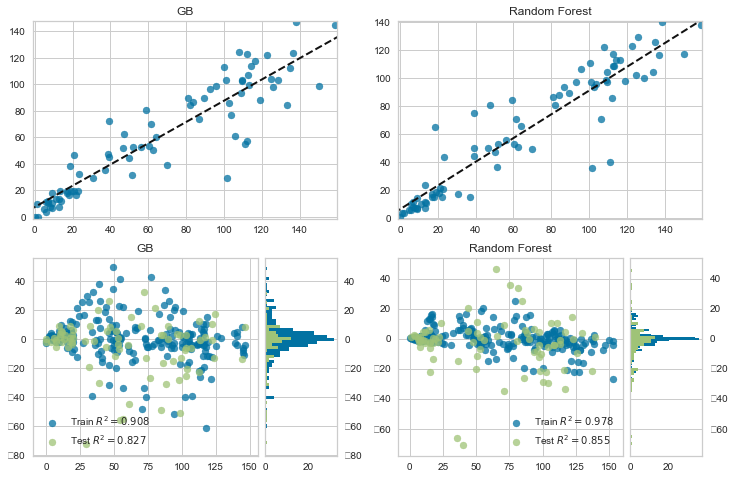

In [29]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plotReg(model, x_train,y_train,x_test,y_test)
plt.title('GB')

plt.subplot(2,2,2)
plotReg(model1, x_train,y_train,x_test,y_test)
plt.title('Random Forest')


plt.subplot(2,2,3)
residual_plot(model, x_train,y_train,x_test,y_test)
plt.legend()
plt.title('GB')

plt.subplot(2,2,4)
residual_plot(model1, x_train,y_train,x_test,y_test)
plt.legend()
plt.title('Random Forest')


